■ 2장 퍼셉트론 ( Perceptron )
==============

1. 지도학습 : 정답(label)이 있는 학습
    
   * 신경망 --> 딥러닝
    
2. 비지도학습 : 정답이 없는 학습

3. 강화학습 : 상, 벌로 학습데이터를 만들어 학습


- 머신러닝의 한 부류인 딥러닝

퍼셉트론에서 출발 → 신경망 → 딥러닝: 더 deep하고 더 wide한 신경망


※ 퍼셉트론: 인간의 뇌세포 중에 하나(뉴런)를 알고리즘으로 구현해 봄

1943년에 미국 신경외과 의사인 워렌 멕컬록에 의해서 발단이 되었고
1957년에 프랑크 로젠 블라트가 퍼셉트론 알고리즘을 고안했다.

→ 사람의 뇌의 동작을 전기 스위치의 on/off로 흉내낼 수 있다는 이론을 증명했다.

간단히 말하면, 인간의 신경세포 하나를 흉내를 냈는데

고등학교 생물시간에 배운 3가지 용어?

1. 자극(simulus)
2. 반응(response)
3. 역치(threshold)

**" 특정 자극이 있다면 그 자극이 어느 역치 이상이러야지만 세포가 반응한다. "**

예: 짜게 먹는 사람은 자기가 평소에 먹는 만큼 음식이 짜지 않으면 싱겁다고 느낀다. (역치 이하의 자극은 무시)
    싱겁게 먹던 사람이 짜게 먹기 시작하면 오랜 시간 지나면 예전에 먹던 싱거운 음식에 만족하지 못한다. (역치 증가)
    

* 뉴런의 갯수 

1. 사람 :  850 억개 
2. 고양이 : 10억개
3. 쥐    :  7천 5백만개
4. 바퀴벌레: 몇백만개
5. 하루살이 : 지금 현재까지 나온 최첨단 인공지능의 뉴런수보다 많다.


※ 퍼셉트론의 역사

1957년에 프랑크 로젠 블라트에 의해 퍼셉트론 알고리즘을 고안되었다.

   ↓

1969년: 퍼셉트론은 단순 선형분류기에 불과하다.
        Why? 단순한 XOR 분류도 하지 못한다고 단정 지음
        
        인공지능의 암흑기에 빠짐

   ↓  

1970년 중반: 역전파 알고리즘 (다층 퍼셉트론)

    당시의 컴퓨터 연산으로는 이 이론을 구현하기가 어려웠음
   
   ↓
   
1986년: 은닉층을 갖는 다층 퍼셉트론 + 오류 역전파 학습 알고리즘의 구현

   ↓
   
오늘날: 신경망으로 구현하고자하는 목표? -> 분류


■ 퍼셉트론 4가지 게이트

In [136]:
# and 퍼셉트론 만들기
import numpy as np

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

targets = np.array([[0],[0],[0],[1]])
targets = np.array([[0],[1],[1],[1]])
targets = np.array([[1],[1],[1],[0]])

def step_function(a):
    
     return np.array( a>= 0, dtype=np.int)
    
def pcntrain(inputs, targets, l_rate, cnt):
    # 가중치란 전류에서 말하는 저항에 해당한다.
    W = np.array([[0.3], [0.4], [0.1]])
    x0 = -1
    
    for i in range(cnt):
        for j,x in enumerate(inputs):
            k = x0 * W[0][0] + x[0] * W[1][0] + x[1] * W[2][0]
            cost = targets[j] - step_function(k)
            if cost!= 0:
                W = change_weight(W, l_rate, x0, x, cost) 
    
    for i, w in enumerate(W):
        print("w"+str(i) + " = "+ str(w[0]))
                
def change_weight(W, l_rate, x0, x, cost):
    
    X = [x0] + list(x)
    for i, w in enumerate(W):
        W[i] = w + l_rate * X[i] * cost
        
    return W

pcntrain(inputs,targets,0.05,10)

w0 = -0.05
w1 = -0.05
w2 = -0.05


{'w0': 0.19999999999999996, 'w1': 0.15000000000000008, 'w2': 0.15000000000000008}


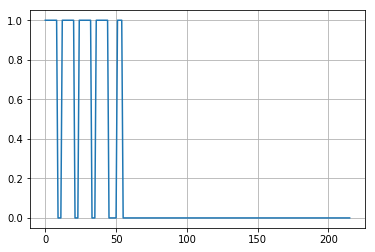

In [107]:
input1_dic = {'x0': -1, 'x1': 0, 'x2':0, 't':0 }
input2_dic = {'x0': -1, 'x1': 0, 'x2':1, 't':0 }
input3_dic = {'x0': -1, 'x1': 1, 'x2':0, 't':0 }
input4_dic = {'x0': -1, 'x1': 1, 'x2':1, 't':1 }
import random
w_dic = {}
w_dic['w0'] = random.randrange(-5,5) * 0.1
w_dic['w1'] = random.randrange(-5,5) * 0.1
w_dic['w2'] = random.randrange(-5,5) * 0.1

# def x_w_sum(input_dic, w_dic):
#     k = w_dic['w0'] * input_dic['x0'] + w_dic['w1'] * input_dic['x1'] + w_dic['w2'] * input_dic['x2']
#     return  (k)

def active_func(input_dic, w_dic):
    k = w_dic['w0'] * input_dic['x0'] + w_dic['w1'] * input_dic['x1'] + w_dic['w2'] * input_dic['x2']
    if k >= 0:
        return 1
    else:
        return 0

x = []   # loop
y = []   # cost
Cost = 0
for k in range(18):

    for i in range(1, 5):
        input_dic = eval('input%s_dic' % i)
        for j in range(3):
            w_dic['w%s' % j] = w_dic['w%s' % j] + \
                                 0.05 * (input_dic['t'] - active_func(input_dic, w_dic)) * input_dic['x%s' % j]
            y.append(-(input_dic['t'] - active_func(input_dic, w_dic)))

print( w_dic )

# print(x,y)

import matplotlib.pyplot as plt
# plt.figure()
# index = [i for i in range(18)]
plt.plot(y)
# plt.xticks(y)
plt.grid()
plt.show()

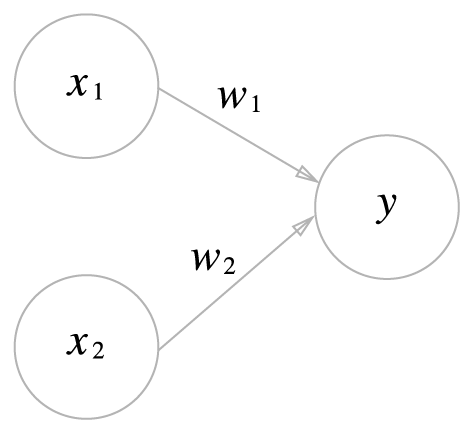

입력신호의 연결강도가 가중치인데, 가중치의 값이 클수록 강한신호이다.
입력신호가 뉴런에 보내질 때는 각각의 고유한 가중치가 곱해진다.


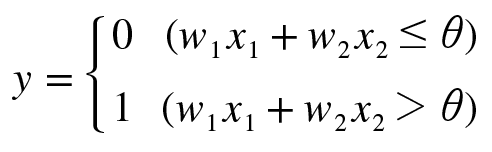

뉴런에서 보내온 신호의 총합이 정해진 한계(임계값== theta)을 넘어설 때만 1을 출력한다.

퍼셉트론은 n 개의 이진수가 하나의 뉴런을 통과해서 가중치의 합이 0보다 크면 활성화되는 가장 간단한 신경망이다.

퍼셉트론은 학습 시키는 방법은 간단한데, 보통 목표치를 정해주고
현재 계산한 값이 목표치와 다르면 그 만큼의 오차를 다시 퍼셉트론에 반영해서 오차를 줄여나가는 방법이다.

In [109]:
# 아래의 식을 파이썬으로 구현하시오.
import numpy as np

x = np.array([0,1])
w = np.array([0.5,0.5])

np.sum(w*x)   # x[0] * w[0] + x[1] * w[1]

0.5


0.5

In [110]:
# 위의 식에 편향을 더한 식을 파이썬으로 구현하시오
import numpy as np

x = np.array([0,1])
w = np.array([0.5,0.5])   # weight
b = -0.7   # bias

np.sum(w*x)+b   # x[0] * w[0] + x[1] * w[1] + b

-0.19999999999999996

#### 1. AND 게이트 진리표
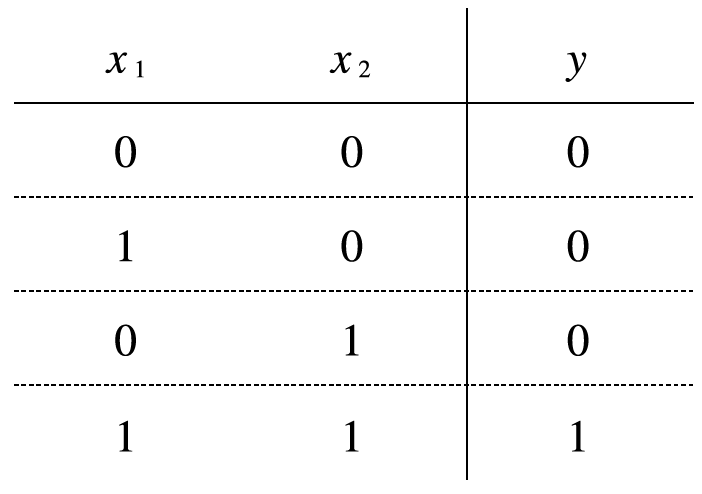

In [117]:
# AND 퍼셉트론 구현하기
# X = np.array([[0,0],[1,0],[0,1],[1,1]])
# W = np.array([0.5,0.5])
# theta = 0.7

# for x in X:
#     if np.sum(W*x) <= theta:
#         print(0)
#     else:
#         print(1)

def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1
        
print(AND(0,0))


0


In [123]:
# AND 퍼셉트론 함수를 이용해서 아래의 inputdata 를 이용해서 출력결과를 for loop문으로 한번에 출력하시오

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])

print("-- And 퍼셉트론 --")
for x in inputData:
    print(x[0],", ",x[1]," ==> ",AND(x[0],x[1]), sep = '')
    

-- And 퍼셉트론 --
0, 0 ==> 0
1, 0 ==> 0
0, 1 ==> 0
1, 1 ==> 1


#### 2. OR 게이트 진리표
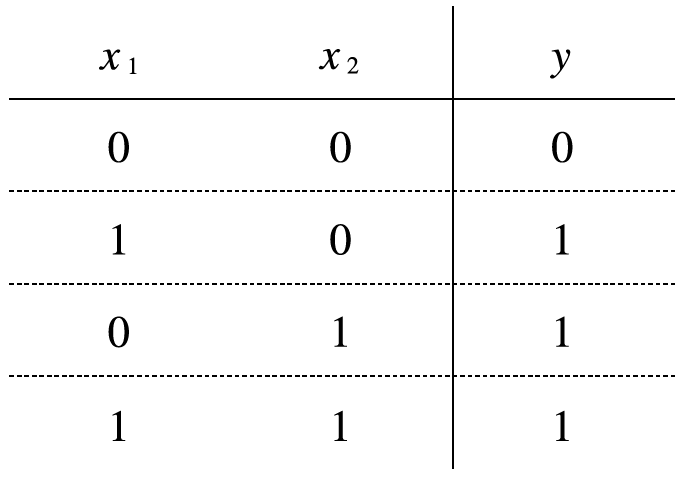

In [131]:
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    theta = 0
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])

print("-- OR 퍼셉트론 --")
for x in inputData:
    print(x[0],", ",x[1]," ==> ",OR(x[0],x[1]), sep = '')

-- OR 퍼셉트론 --
0, 0 ==> 0
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 1


#### 3. NAND(Not AND)

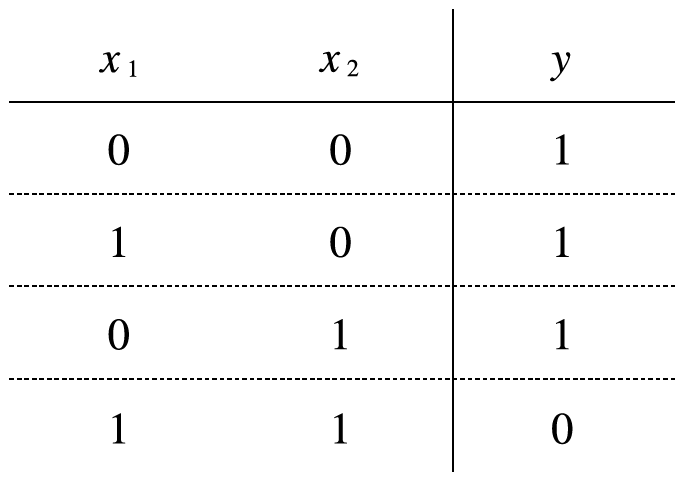

In [145]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    theta = -0.7
    if np.sum(w*x) <= theta:
        return 0
    else:
        return 1

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])

print("-- NAND 퍼셉트론 --")
for x in inputData:
    print(x[0],", ",x[1]," ==> ",NAND(x[0],x[1]), sep = '')

-- NAND 퍼셉트론 --
0, 0 ==> 1
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 0


In [14]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])  # and 와는 가중치(w,b)만 다르다
    b = 0.7
    tmp = sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])   # and 와는 가중치(w,b)만 다르다
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
inputs2 = inputs.flatten()
for i in range(0,len(inputs2),2):
    print(AND(inputs2[i],inputs2[i+1]))


0
0
0
1


■ 단층 퍼셉트론 vs 다층 퍼셉트론

1958년 로젠블래트가 퍼셉트론을 제안했다.
1959년 민스키가 기존 퍼셉트론의 몬제점을 지적했는데 xor 분류를 못한다는 문제점을 지적하고 인공지능의 겨울기가 시작되었다.

즉, xor 게이트는 단층 신경망으로 구현이 안되는 것이고,
    xor 게이트는 다층 신경망으로 구현해야하는 것이다.

1. 단층: 입력층 --> 출력층

    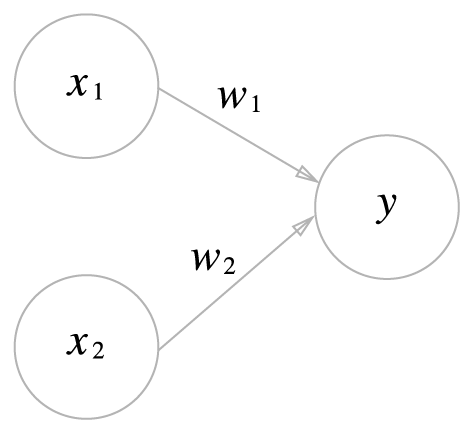

2. 다층: 얕은 신경망 or 깊은 신경망
         얕은 신경망: 입력층 --> 은닉층 --> 출력층
         깊은 신경망: 입력층 --> 은닉층s --> 출력층  (deep learning)
         
    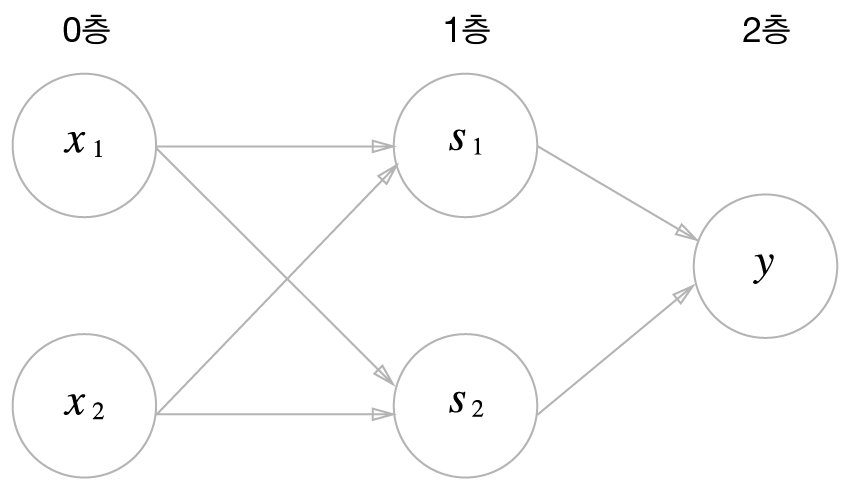     

#### 4. XOR 게이트 진리표

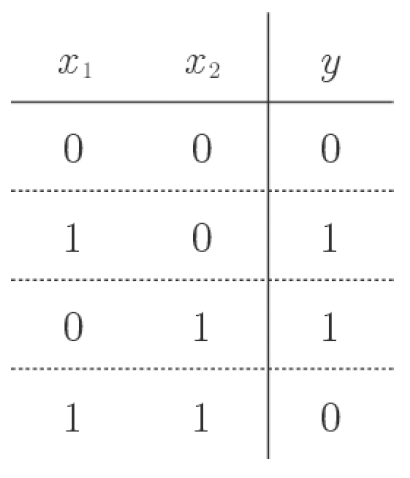


##### XOR 다층 퍼셉트론

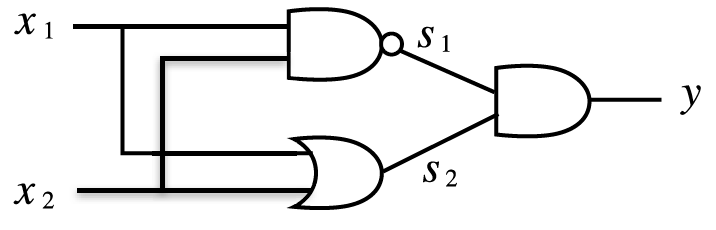

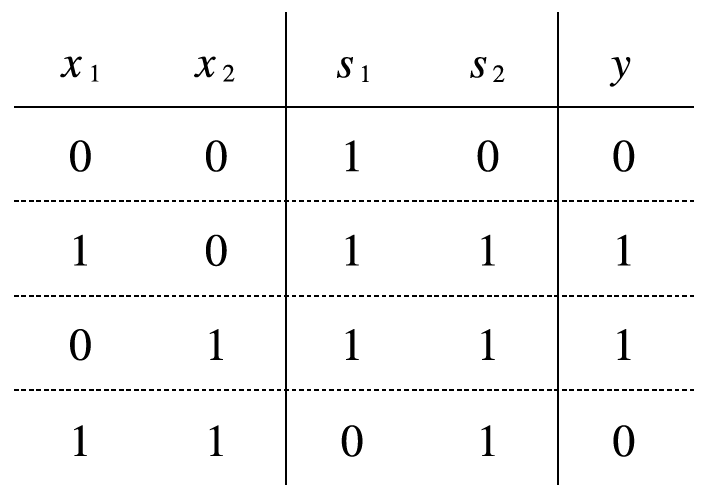

In [148]:
def XOR(x1, x2):
    return AND(NAND(x1,x2), OR(x1,x2))

inputData = np.array([[0,0],[1,0],[0,1],[1,1]])

print("-- XDR 퍼셉트론 --")
for x in inputData:
    print(x[0],", ",x[1]," ==> ",XOR(x[0],x[1]), sep = '')

-- XDR 퍼셉트론 --
0, 0 ==> 0
1, 0 ==> 1
0, 1 ==> 1
1, 1 ==> 0
